In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from cv2 import imshow
import tensorflow as tf
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.14.0'

## Loading em Tangs

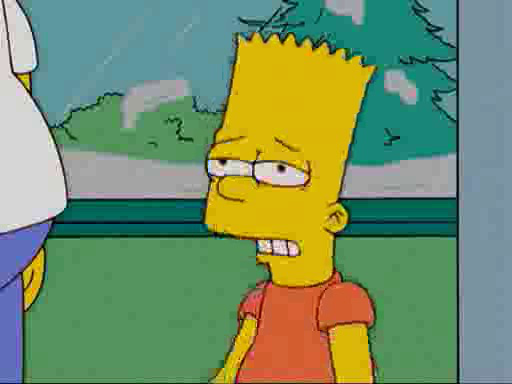

In [15]:
image.load_img("Homer_Bart_Big2\\train\\bart_simpson\pic_0230.jpg")


In [16]:
training_generator = ImageDataGenerator(rescale=1. / 255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2  
                                        )

In [17]:
train_dataset = training_generator.flow_from_directory('Homer_Bart_Big2\\train',
                                                        target_size=(64,64), 
                                                        batch_size=8, 
                                                        class_mode='categorical',
                                                        shuffle=True
                                                        )

Found 2042 images belonging to 2 classes.


In [18]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
train_dataset.class_indices

{'bart_simpson': 0, 'homer_simpson': 1}

In [21]:
test_generator = ImageDataGenerator(rescale=1. / 255)

test_dataset = test_generator.flow_from_directory('Homer_Bart_Big2\\test',
                                                        target_size=(64,64), 
                                                        batch_size=1, 
                                                        class_mode='categorical',
                                                        shuffle=False
                                                        )

Found 490 images belonging to 2 classes.


## Creating and Training Model

In [22]:
network = Sequential()

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
            
network.add(Flatten())

network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=2, activation='softmax')) # returns probability for each class. Sigmoid would return probability for 1 class

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

In [23]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = network.fit_generator(train_dataset, epochs=50)

C:\Users\HP\AppData\Local\Temp\ipykernel_9656\1245503893.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=50)


Epoch 1/50
256/256 [==============================] - 62s 230ms/step - loss: 0.5287 - accuracy: 0.7311
Epoch 2/50
256/256 [==============================] - 25s 96ms/step - loss: 0.4115 - accuracy: 0.8183
Epoch 3/50
256/256 [==============================] - 25s 98ms/step - loss: 0.3638 - accuracy: 0.8413
Epoch 4/50
256/256 [==============================] - 25s 97ms/step - loss: 0.2964 - accuracy: 0.8766
Epoch 5/50
256/256 [==============================] - 26s 100ms/step - loss: 0.2808 - accuracy: 0.8815
Epoch 6/50
256/256 [==============================] - 25s 98ms/step - loss: 0.2328 - accuracy: 0.9021
Epoch 7/50
256/256 [==============================] - 26s 100ms/step - loss: 0.1828 - accuracy: 0.9290
Epoch 8/50
256/256 [==============================] - 26s 101ms/step - loss: 0.1680 - accuracy: 0.9354
Epoch 9/50
256/256 [==============================] - 25s 99ms/step - loss: 0.1641 - accuracy: 0.9368
Epoch 10/50
256/256 [==============================] - 26s 101ms/step - loss: 

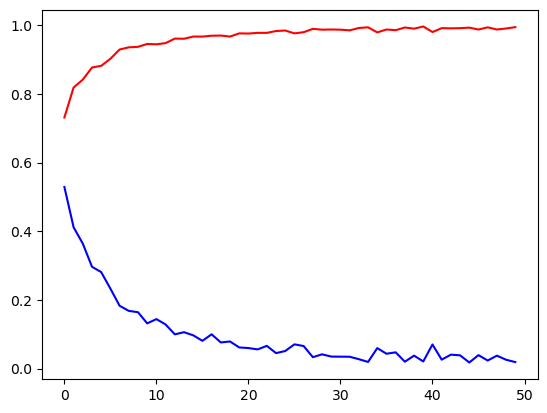

In [55]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['accuracy'], color='red')
# plt.imshow()


In [25]:
predictions = network.predict(test_dataset)
predictions

490/490 [==============================] - 15s 30ms/step


array([[1.00000000e+00, 1.78341057e-11],
       [1.00000000e+00, 2.22040377e-12],
       [6.97520792e-01, 3.02479237e-01],
       [9.94331121e-01, 5.66890556e-03],
       [1.00000000e+00, 3.39437124e-11],
       [9.99999762e-01, 1.81903772e-07],
       [9.89218891e-01, 1.07811503e-02],
       [1.00000000e+00, 1.11630634e-19],
       [2.27220934e-02, 9.77277935e-01],
       [1.00000000e+00, 5.72838324e-16],
       [1.00000000e+00, 1.31271101e-08],
       [9.99998331e-01, 1.61184857e-06],
       [9.91357088e-01, 8.64289422e-03],
       [1.00000000e+00, 1.75654156e-15],
       [1.00000000e+00, 4.38215274e-13],
       [9.99893785e-01, 1.06221523e-04],
       [1.00000000e+00, 5.45301226e-09],
       [9.99990463e-01, 9.48938032e-06],
       [1.00000000e+00, 8.62837769e-14],
       [1.00000000e+00, 6.82352674e-10],
       [1.00000000e+00, 2.95228963e-14],
       [1.00000000e+00, 1.19082189e-09],
       [1.00000000e+00, 3.84818483e-10],
       [1.00000000e+00, 5.43223015e-20],
       [9.999997

In [26]:
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [27]:
# expected output
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(test_dataset.classes, predictions)

0.9510204081632653

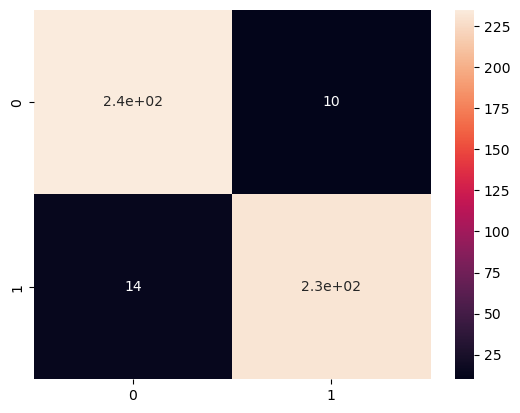

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True);

In [30]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       245
           1       0.96      0.94      0.95       245

    accuracy                           0.95       490
   macro avg       0.95      0.95      0.95       490
weighted avg       0.95      0.95      0.95       490



## Saving Model to Json

In [31]:
model_json = network.to_json()
with open('network_big.json', 'w') as json_file:
    json_file.write(model_json)

In [32]:
from keras.models import save_model
network_saved = save_model(network, 'weights_big.hdf5')

C:\Users\HP\AppData\Local\Temp\ipykernel_9656\4107822060.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network, 'weights_big.hdf5')


## Load Model

In [33]:
with open('network_big.json', 'r') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_3_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null

In [34]:
import tensorflow as tf
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights_big.hdf5')

network_loaded.compile(optimizer = 'Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
network_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

## Classifying Single Image

In [36]:
import cv2
from cv2 import imshow

image = cv2.imread('homer_bart_2\homer_pred2.png')
# image = cv2.imread('Homer_bart_test\\bart_simpson\pic_0192.jpg')
# image = cv2.imread('homer_bart_2\\test_set\homer\homer15.bmp')

In [29]:
cv2.imshow('img', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
image = cv2.resize(image, (64,64))


In [ ]:
cv2.imshow('img', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [38]:
image = image / 255
image

array([[[0.77647059, 0.56078431, 0.71372549],
        [0.77647059, 0.56078431, 0.71372549],
        [0.77647059, 0.56078431, 0.71372549],
        ...,
        [0.14901961, 0.74117647, 0.72941176],
        [0.14901961, 0.74117647, 0.72941176],
        [0.14901961, 0.74117647, 0.72941176]],

       [[0.77647059, 0.56078431, 0.71372549],
        [0.77647059, 0.56078431, 0.71372549],
        [0.77647059, 0.56078431, 0.71372549],
        ...,
        [0.14901961, 0.74117647, 0.72941176],
        [0.14901961, 0.74117647, 0.72941176],
        [0.14901961, 0.74117647, 0.72941176]],

       [[0.50980392, 0.39215686, 0.56862745],
        [0.58431373, 0.41176471, 0.53333333],
        [0.68235294, 0.47843137, 0.59607843],
        ...,
        [0.14901961, 0.74117647, 0.72941176],
        [0.14901961, 0.74117647, 0.72941176],
        [0.15294118, 0.74117647, 0.73333333]],

       ...,

       [[0.89803922, 0.81568627, 0.81176471],
        [0.89803922, 0.81568627, 0.81176471],
        [0.89803922, 0

In [20]:
image.shape

(64, 64, 3)

In [39]:
image = image.reshape(-1, 64,64,3)
image.shape

(1, 64, 64, 3)

In [40]:
result = network_loaded.predict(image)
result

1/1 [==============================] - 0s 115ms/step


array([[0.95638543, 0.04361452]], dtype=float32)

In [41]:
import numpy as np

result = np.argmax(result)
result

0

In [42]:
if result == 0:
    print('bart')
else:
    print('homer')

bart


In [58]:
image = cv2.imread('homer_bart_2\\bart_pred3.png')
image = cv2.resize(image, (64,64)) / 255
image = image.reshape(-1, 64,64,3)
result = network_loaded.predict(image)
result = np.argmax(result)
if result == 0:
    print('bart')
else:
    print('homer')

1/1 [==============================] - 0s 26ms/step
homer
